# Decision Tree Classification

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [12]:
dataset = pd.read_csv('../data/drug200.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


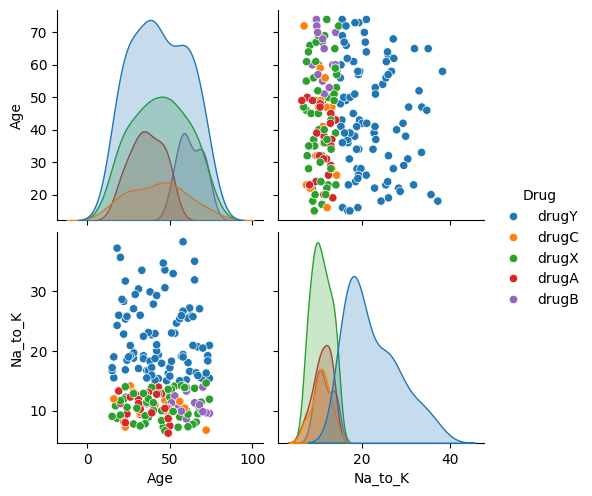

In [14]:
sns.pairplot(dataset, hue='Drug')

From here, we can see there are some points that are not linearly separable such as drugX and drugA. On the contrary, drugY seems to be clearly separable from the rest. I used datawrangler to grab distinct values of each column. There was not any missing data.

## Preprocessing

In [15]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values #Drug is target variable

In [19]:
le = LabelEncoder()

for col in range(X.shape[1]):
    # If the column is of type string
    if X[:, col].dtype == object:
        X[:, col] = le.fit_transform(X[:, col])

print(X)

[[8 0 0 0 167]
 [30 1 1 0 89]
 [30 1 1 0 43]
 [12 0 2 0 10]
 [44 0 1 0 133]
 [7 0 2 0 16]
 [32 0 2 0 120]
 [25 1 1 0 59]
 [43 1 2 0 111]
 [27 1 1 1 147]
 [30 0 1 0 71]
 [18 0 0 1 145]
 [27 1 1 0 112]
 [56 0 1 0 156]
 [33 0 2 0 80]
 [1 0 0 1 116]
 [52 1 1 1 68]
 [27 1 0 0 101]
 [8 1 1 0 5]
 [16 0 0 1 175]
 [40 1 1 1 143]
 [46 1 2 0 173]
 [30 1 1 1 187]
 [31 0 1 0 109]
 [17 0 1 0 191]
 [12 0 0 1 139]
 [15 1 0 0 186]
 [32 0 2 1 25]
 [23 0 1 1 159]
 [28 1 1 0 132]
 [3 0 2 1 19]
 [56 1 0 0 30]
 [32 1 1 1 58]
 [48 0 0 1 189]
 [36 1 2 0 103]
 [29 1 2 1 4]
 [16 1 0 1 27]
 [23 1 1 1 99]
 [23 0 2 1 33]
 [0 1 2 0 22]
 [55 0 2 0 146]
 [41 0 0 1 106]
 [33 1 2 1 117]
 [8 1 2 0 76]
 [33 0 2 1 77]
 [49 0 2 1 13]
 [21 0 0 0 88]
 [51 1 1 0 45]
 [8 1 2 0 188]
 [12 0 1 0 150]
 [41 0 0 0 148]
 [50 1 2 1 55]
 [45 1 1 1 179]
 [9 0 0 1 136]
 [51 0 0 1 44]
 [11 0 1 0 104]
 [48 1 0 1 64]
 [24 1 0 0 180]
 [43 1 2 1 41]
 [18 1 0 0 137]
 [22 0 1 1 185]
 [9 1 0 1 28]
 [50 1 1 1 153]
 [28 1 1 1 15]
 [43 0 0 0 91]
 [